In [22]:
import numpy as np
import pandas as pd
from implementations import reg_logistic_regression, ridge_regression
from helpers import predict_labels, get_cross_validation_data, compute_loss_rlr, \
 mse_loss, get_accuracy, build_poly, split_data, mae_loss, data_norm, feature_expansion, remove_outliers
from proj1_helpers import load_csv_data, create_csv_submission, predict_labels
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#load data and split it according to the column named PRI_ject_num
y, X, ids = load_csv_data("data/train.csv") 
kind = X[:,-8]

#get index set of different PRI_ject_num(0, 1, 2&3)
zero_set = np.where(kind == 0)
one_set = np.where(kind == 1)
two_three_set = np.where((kind == 2)|(kind == 3))

#delete the columns that are meaningless or uncomputable based on specific PRI_ject_num
#collect data sets(specific row groups) according to different PRI_ject_num
zero_delete_col = [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29] 
one_delete_col = [4, 5, 6, 12, 22, 26, 27, 28]

X_zero = np.delete(X, zero_delete_col, axis = 1)[zero_set,:].squeeze()
y_zero = y[zero_set]
X_one = np.delete(X, one_delete_col, axis = 1)[one_set,:].squeeze()
y_one = y[one_set]
X_two_three = X[two_three_set,:].squeeze()
y_two_three = y[two_three_set]

In [41]:
lambdas = np.logspace(-5, 0, 5)
degrees = list(range(1,15))

def lambda_degree_demo(x, y, degrees, lambdas, seed, k_fold=5):
    """lambda and degree experiment demo."""
    # ridge regression with different lambda and degree
    rmse_trs = np.empty((len(lambdas), len(degrees)))
    rmse_tes = np.empty((len(lambdas), len(degrees)))
    accs = np.empty((len(lambdas), len(degrees)))
    for inl, lambda_ in enumerate(lambdas):
        for ind, degree in enumerate(degrees):
            x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, seed=seed)
            x_tr = feature_expansion(x_tr, degree)
            x_te = feature_expansion(x_te, degree)
            w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
            loss_te = mse_loss(y_te, x_te, w)
            y_pred = predict_labels(w, x_te)
            acc = get_accuracy(y_pred, y_te)
            rmse_trs[inl, ind] = np.sqrt(2 * loss_tr)
            rmse_tes[inl, ind] = np.sqrt(2 * loss_te)
            accs[inl, ind] = acc
            print(f'lambda:{lambda_}, degree:{degree}, acc:{acc}')
    return accs

rmse_tes = lambda_degree_demo(X_zero, y_zero, degrees, lambdas, seed=2021, k_fold=5)

lambda:1e-05, degree:1, acc:0.8323074613421408
lambda:1e-05, degree:2, acc:0.836010609017665
lambda:1e-05, degree:3, acc:0.8379122253915828
lambda:1e-05, degree:4, acc:0.8384626932892959
lambda:1e-05, degree:5, acc:0.8424660961817545
lambda:1e-05, degree:6, acc:0.8435169894410248
lambda:1e-05, degree:7, acc:0.844617925236451
lambda:1e-05, degree:8, acc:0.8448180953810739
lambda:1e-05, degree:9, acc:0.8455687334234099
lambda:1e-05, degree:10, acc:0.8449682229895411
lambda:1e-05, degree:11, acc:0.8341590351799029
lambda:1e-05, degree:12, acc:0.8198969123755192
lambda:1e-05, degree:13, acc:0.8340089075714358
lambda:1e-05, degree:14, acc:0.6510033528499224
lambda:0.00017782794100389227, degree:1, acc:0.8301055897512886
lambda:0.00017782794100389227, degree:2, acc:0.8345593754691488
lambda:0.00017782794100389227, degree:3, acc:0.8368112895961567
lambda:0.00017782794100389227, degree:4, acc:0.8377620977831156
lambda:0.00017782794100389227, degree:5, acc:0.8418655857478857
lambda:0.0001778279

## Experiment of different Lambda and degree
As lambda and degree interactively effect each other, we jointly test them.

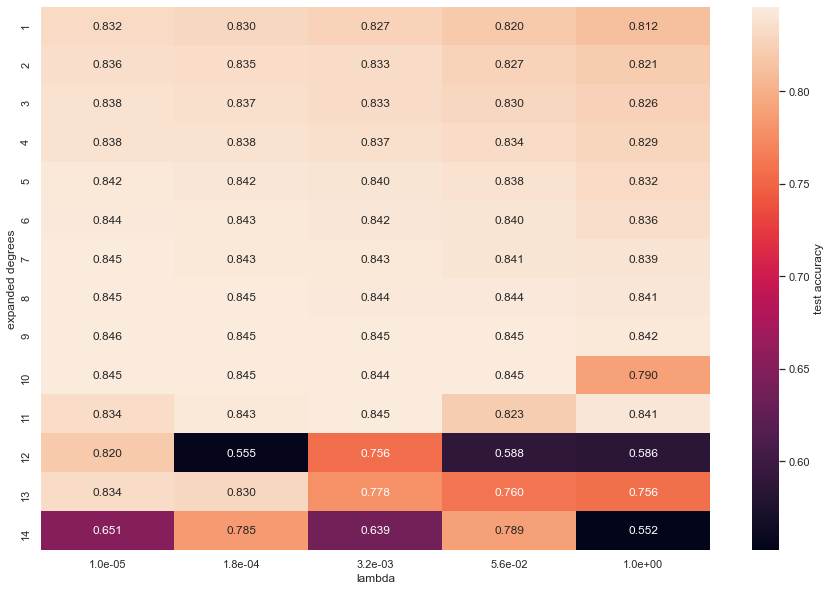

In [53]:
lambdas_label = ["%.1e" % i for i in lambdas]
plt.figure(figsize=(15,10))
sns.heatmap(rmse_tes.T, annot=True, fmt='.3f',xticklabels=lambdas_label, yticklabels=degrees, cbar_kws={'label': 'test accuracy'})
plt.ylabel("expanded degrees")
plt.xlabel("lambda")
plt.savefig(fname='a.png', dpi=100)

In [45]:
lambdas = np.logspace(-5, 0, 5)
degrees = list(range(1,15))

def lambda_degree_demo(x, y, degrees, lambdas, seed, k_fold=5):
    """lambda and degree experiment demo."""
    # ridge regression with different lambda and degree
    rmse_trs = np.empty((len(lambdas), len(degrees)))
    rmse_tes = np.empty((len(lambdas), len(degrees)))
    accs = np.empty((len(lambdas), len(degrees)))
    for inl, lambda_ in enumerate(lambdas):
        for ind, degree in enumerate(degrees):
            
            x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, seed=seed)
            x_tr = feature_expansion(x_tr, degree)
            x_te = feature_expansion(x_te, degree)
            w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
            loss_te = mse_loss(y_te, x_te, w)
            y_pred = predict_labels(w, x_te)
            acc = get_accuracy(y_pred, y_te)
            rmse_trs[inl, ind] = np.sqrt(2 * loss_tr)
            rmse_tes[inl, ind] = np.sqrt(2 * loss_te)
            accs[inl, ind] = acc
            print(f'lambda:{lambda_}, degree:{degree}, acc:{acc}')
    return accs

rmse_tes_one = lambda_degree_demo(X_one, y_one, degrees, lambdas, seed=2021, k_fold=5)

lambda:1e-05, degree:1, acc:0.7665226642594622
lambda:1e-05, degree:2, acc:0.7840608678831646
lambda:1e-05, degree:3, acc:0.7856728351279902
lambda:1e-05, degree:4, acc:0.78502804823006
lambda:1e-05, degree:5, acc:0.7926365336256367
lambda:1e-05, degree:6, acc:0.799148881294732
lambda:1e-05, degree:7, acc:0.7976658714294925
lambda:1e-05, degree:8, acc:0.8002450190212135
lambda:1e-05, degree:9, acc:0.8034044748210717
lambda:1e-05, degree:10, acc:0.8037913469598298
lambda:1e-05, degree:11, acc:0.8050809207556903
lambda:1e-05, degree:12, acc:0.5792765491005223
lambda:1e-05, degree:13, acc:0.4933264556064221
lambda:1e-05, degree:14, acc:0.5866915984267199
lambda:0.00017782794100389227, degree:1, acc:0.7618157199045715
lambda:0.00017782794100389227, degree:2, acc:0.7787736153201367
lambda:0.00017782794100389227, degree:3, acc:0.7788380940099298
lambda:0.00017782794100389227, degree:4, acc:0.7854149203688181
lambda:0.00017782794100389227, degree:5, acc:0.7923786188664647
lambda:0.00017782794

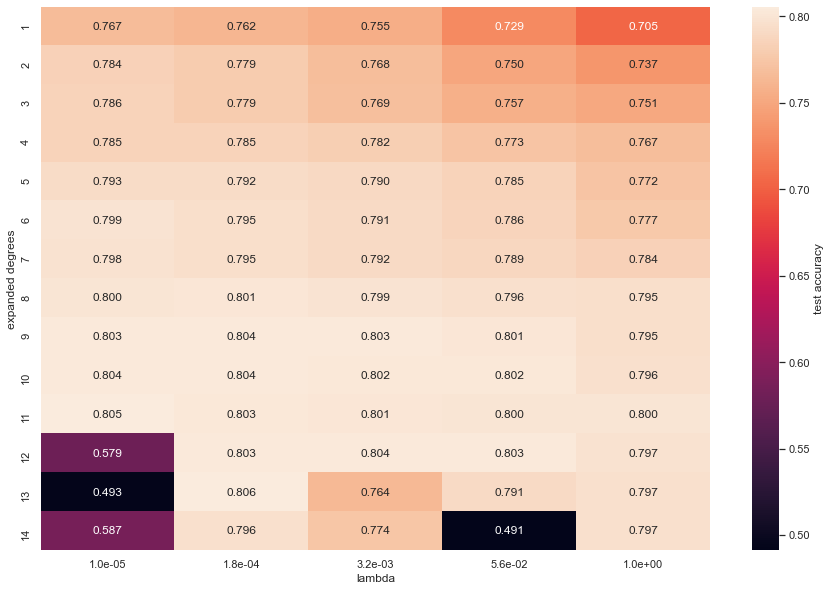

In [52]:
lambdas_label = ["%.1e" % i for i in lambdas]
plt.figure(figsize=(15,10))
sns.heatmap(rmse_tes_one.T, annot=True, fmt='.3f',xticklabels=lambdas_label, yticklabels=degrees, cbar_kws={'label': 'test accuracy'})
plt.ylabel("expanded degrees")
plt.xlabel("lambda")
plt.savefig(fname='b.png', dpi=100)

In [39]:
lambdas = np.logspace(-5, 0, 5)
degrees = list(range(1,15))

def lambda_degree_demo(x, y, degrees, lambdas, seed, k_fold=5):
    """lambda and degree experiment demo."""
    # ridge regression with different lambda and degree
    rmse_trs = np.empty((len(lambdas), len(degrees)))
    rmse_tes = np.empty((len(lambdas), len(degrees)))
    accs = np.empty((len(lambdas), len(degrees)))
    for inl, lambda_ in enumerate(lambdas):
        for ind, degree in enumerate(degrees):
            
            x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, seed=seed)
            x_tr = feature_expansion(x_tr, degree)
            x_te = feature_expansion(x_te, degree)
            w, loss_tr = ridge_regression(y_tr, x_tr, mse_loss, lambda_)
            loss_te = mse_loss(y_te, x_te, w)
            y_pred = predict_labels(w, x_te)
            acc = get_accuracy(y_pred, y_te)
            rmse_trs[inl, ind] = np.sqrt(2 * loss_tr)
            rmse_tes[inl, ind] = np.sqrt(2 * loss_te)
            accs[inl, ind] = acc
            print(f'lambda:{lambda_}, degree:{degree}, acc:{acc}')
    return accs

rmse_tes_two_three = lambda_degree_demo(X_two_three, y_two_three, degrees, lambdas, seed=2021, k_fold=5)

lambda:1e-05, degree:1, acc:0.801640361155145
lambda:1e-05, degree:2, acc:0.8068784892135915
lambda:1e-05, degree:3, acc:0.8106692397822042
lambda:1e-05, degree:4, acc:0.8114273898959267
lambda:1e-05, degree:5, acc:0.8161830587910952
lambda:1e-05, degree:6, acc:0.8309325246398787
lambda:1e-05, degree:7, acc:0.835550348059825
lambda:1e-05, degree:8, acc:0.8361017299607141
lambda:1e-05, degree:9, acc:0.8362395754359363
lambda:1e-05, degree:10, acc:0.8377558756633814
lambda:1e-05, degree:11, acc:0.838100489351437
lambda:1e-05, degree:12, acc:0.8369977255496588
lambda:1e-05, degree:13, acc:0.8323799021297126
lambda:1e-05, degree:14, acc:0.5299469294920395
lambda:0.00017782794100389227, degree:1, acc:0.7924047143152526
lambda:0.00017782794100389227, degree:2, acc:0.7982631470121994
lambda:0.00017782794100389227, degree:3, acc:0.8002619064029223
lambda:0.00017782794100389227, degree:4, acc:0.8029498931697567
lambda:0.00017782794100389227, degree:5, acc:0.8144599903508167
lambda:0.00017782794

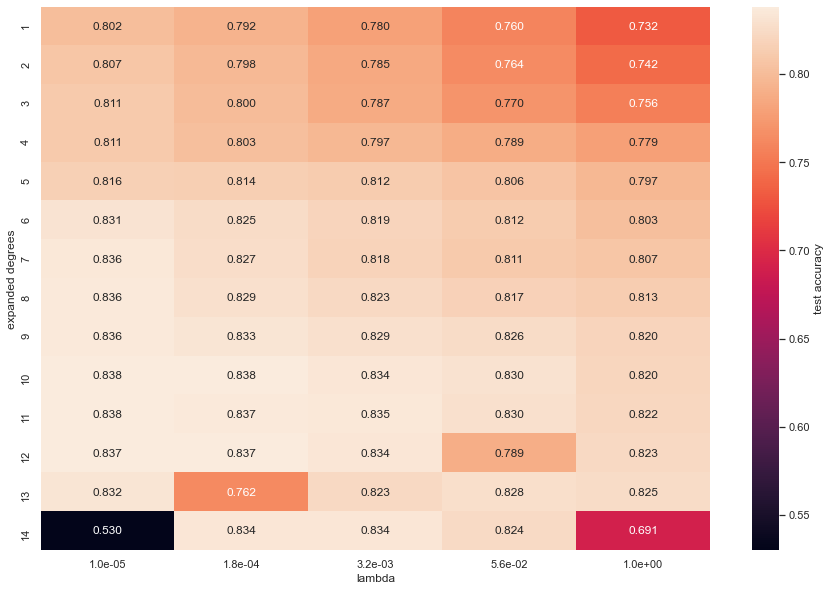

In [51]:
lambdas_label = ["%.1e" % i for i in lambdas]
plt.figure(figsize=(15,10))
sns.heatmap(rmse_tes_two_three.T, annot=True, fmt='.3f',xticklabels=lambdas_label, yticklabels=degrees, cbar_kws={'label': 'test accuracy'})
plt.ylabel("expanded degrees")
plt.xlabel("lambda")
plt.savefig(fname='c.png', dpi=100)